# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

\<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [53]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [95]:
URL = 'https://api.hh.ru/vacancies'

jobs = ['Кардиолог', 'Профессор', 'Футбольный тренер', 'Музыкант', 'Стюардесса']
vacancies = {prof : [] for prof in jobs}

for profession in jobs:
    params = {
        'text': profession,
        'area': 1,
        'page': 0,
        'per_page': 100
    }
    data = requests.get(URL, params).json()
    sleep(1)
    for page in range(data["pages"]):
        params = {
            'text': profession,
            'area': 1,
            'page': page,
            'per_page': 100
        }
        page_data = requests.get(URL, params).json()
        sleep(1)
        for vacancy in page_data["items"]:
            vacancies[profession].append(vacancy)

    print(f"Найдено {data['found']} вакансий по профессии {profession}")

Найдено 405 вакансий по профессии Кардиолог
Найдено 111 вакансий по профессии Профессор
Найдено 70 вакансий по профессии Футбольный тренер
Найдено 57 вакансий по профессии Музыкант
Найдено 71 вакансий по профессии Стюардесса


(1 балл) Посчитайте сколько всего найдено вакансий:

In [102]:
total = 0
for profession in jobs:
    total += len(vacancies[profession])
print( f"Всего вакансий: {total}")

Всего вакансий: 714


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [103]:
class Company:
    def __init__(self, name, x_coord, y_coord):
      self.name = name
      self.x_coord = x_coord
      self.y_coord = y_coord

    def get_name(self):
      return self.name
    def get_x_coord(self):
      return self.x_coord
    def get_y_coord(self):
      return self.y_coord
    def show(self):
      return f"Название: {self.name}"
    def show_name(self):
      return f"Название: {self.name}"
    def __eq__(self, other):
      return self.name == other.name



(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [105]:
vacancy_with_coords = 0
list_vacancy_with_coords = []
vacancy_inside_mkad = []
inside_mkad = 0
y_min_mkad_coords = 55.55
y_max_mkad_coords = 55.90
x_min_mkd_coords = 37.35
x_max_mkd_coords = 37.85
companies = []

for profession in vacancies:
    for vacancy in vacancies[profession]:
        name = vacancy["employer"]["name"]
        x = None
        y = None
        if vacancy["address"] != None:
            x = vacancy["address"]["lat"]
            y = vacancy["address"]["lng"]
            vacancy_with_coords += 1;
        company = Company(name, x, y)
        if company not in companies:
            companies.append(company)
        if vacancy["address"] != None:
          list_vacancy_with_coords.append(company)
        if (x!= None) and (y != None) and (x_min_mkad_coords <= x <= x_max_mkad_coords) and (y_min_mkd_coords <= y <= y_max_mkd_coords):
          vacancy_inside_mkad.append(company)
          inside_mkad += 1

print(f"Количество компаний: {len(companies)}")


Количество компаний: 308


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [106]:
print(vacancy_with_coords)

515


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [107]:
print(inside_mkad)
for i in range(len(vacancy_inside_mkad)):
  print(vacancy_inside_mkad[i].show())

435
Название: Сеть ветеринарных клиник БиоВет
Название: ГБУЗ г.Москвы ГП№170 ДЗМ
Название: ГБУЗ ГКБ им. В.В.Вересаева ДЗМ
Название: Сеть ветеринарных клиник БиоВет
Название: ГБУЗ города Москвы Городская поликлиника № 67 Департамента здравоохранения города Москвы
Название: Сеть ветеринарных клиник БиоВет
Название: Латрек
Название: ПОДРУЖКИ
Название: АстраЗенека
Название: ФГБУ Национальный медицинский исследовательский центр кардиологии имени академика Е.И. Чазова Министерства здравоохранения Российской Федерации
Название: Московская клиника
Название: Представительство компании Шайн Бизнес корп
Название: MAJOR CLINIC
Название: Премиум Клиник - 2
Название: Центральный клинический госпиталь ФТС России
Название: ФГБУ Национальный медицинский исследовательский центр кардиологии имени академика Е.И. Чазова Министерства здравоохранения Российской Федерации
Название: Хелс Бадди
Название: ГБУЗ Городская клиническая больница имени М.Е. Жадкевича Департамента здравоохранения г. Москвы
Название: Се

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

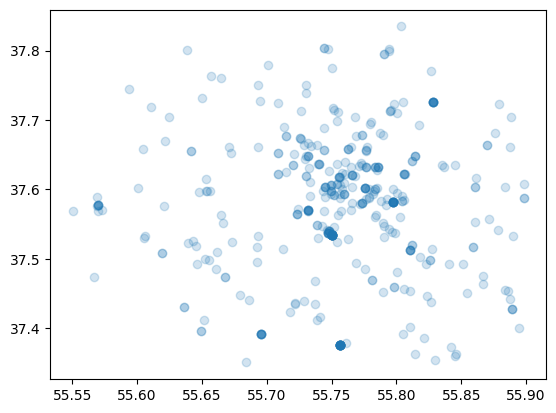

In [108]:
x_coord = []
y_coord = []
for company in vacancy_inside_mkad:
  x_coord.append(company.get_x_coord())
  y_coord.append(company.get_y_coord())

plt.scatter(x_coord, y_coord, alpha = 0.2)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [111]:
import pandas as pd
import plotly.express as px
vacancies = []
for company in list_vacancy_with_coords:
  vacancies.append({
      "name" : company.get_name(),
      "lat" : company.get_x_coord(),
      "lng" : company.get_y_coord(),
  })

data_frame = pd.DataFrame(vacancies)
fig = px.scatter_mapbox(data_frame, lat="lat", lon="lng", hover_name="name", hover_data=["name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300, center = {"lat" : 55.752220, "lon" : 37.615560})
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

[link text](https://)Ваши выводы здесь :)

Большая часть предложений по выбранным вакансиям находятся в центре Москвы. Однако, сразу можно заметить, что большинство предложений на профессию стюардессы, как раз близко к аэропортам. Вакансии кардиологов предлагают, как частные фирмы, так и государственые. Больший спрос на музыкантов также находится в центре Москвы.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 126MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_price = diamonds["total_sales_price"].max()
min_price = diamonds["total_sales_price"].min()

str_max = diamonds[diamonds['total_sales_price']==max_price]
cell_max = str_max["Unnamed: 0"].iloc[0]

str_min = diamonds[diamonds['total_sales_price']==min_price]
cell_min = str_min["Unnamed: 0"].iloc[0]
print(f"{cell_max} - {max_price}")
print(f"{cell_min} - {min_price}")

219703 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
diamonds_replaced = diamonds.replace("unknown", None)
no_data = diamonds_replaced.isnull().sum().sum()
no_data

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
list = diamonds_replaced.columns.tolist()
for i in list:
  if diamonds_replaced[i].isnull().sum()!=0:
    print(i)


color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
list = diamonds.columns.tolist()
columns = []
cnt = 0
for i in list:
  if i.startswith("fancy_color_") or i.startswith("fluor_"):
    columns.append(i)
    cnt+=1
print(cnt)


6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
diamonds_replaced = diamonds.replace("unknown", None)
sum = 0
sum2 = 0
for i in columns:
    print(f"{i} - {diamonds[i].shape[0] - diamonds_replaced[i].isnull().sum()}")
    sum+=diamonds[i].shape[0] - diamonds_replaced[i].isnull().sum()
    sum2 += diamonds_replaced[i].count().sum()
print(sum2)


fluor_color - 15726
fluor_intensity - 76084
fancy_color_dominant_color - 9164
fancy_color_secondary_color - 1062
fancy_color_overtone - 388
fancy_color_intensity - 9162
111586


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
for i in columns:
  diamonds = diamonds.drop(i, axis = 1)
diamonds


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
list = diamonds.columns.tolist()
columns = []
cnt = 0
for i in list:
  if i.startswith("culet_"):
    columns.append(i)
    cnt+=1
print(f"Количество колонок, которые начинаются с 'culet_' - {cnt}")
print("Количество информативных данных: ")
diamonds_replaced = diamonds.replace("unknown", None)
for i in columns:
    print(f"{i} - {diamonds[i].shape[0] - diamonds_replaced[i].isnull().sum().sum()}")
print("Таблица после удаления этих столбцов:")
for i in columns:
  diamonds = diamonds.drop(i, axis = 1)
diamonds


Количество колонок, которые начинаются с 'culet_' - 2
Количество информативных данных: 
culet_size - 133963
culet_condition - 15319
Таблица после удаления этих столбцов:


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds["total_sales_price"].sum()

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[diamonds["Unnamed: 0"] % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219693,219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122
219697,219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,72.8,55.0,14.13,10.86,7.90,unknown,unknown,1161102
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds[diamonds["Unnamed: 0"] % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,219678,Round,G,VS1,10.14,Excellent,GIA,Excellent,Excellent,unknown,61.8,59.0,13.84,13.88,8.56,M,STK,851760
219683,219684,Pear,unknown,VS2,1.51,unknown,GIA,Very Good,Very Good,unknown,63.8,59.0,10.73,5.61,3.58,unknown,unknown,966401
219689,219690,Round,F,IF,10.66,Excellent,GIA,Excellent,Excellent,unknown,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
categories = ["cut", "color", "clarity", "cut_quality", "lab", "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]
diamonds[categories]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
df_column = diamonds["total_sales_price"]
df_row = df_column.T
mult = df_row.dot(df_column)
mult

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

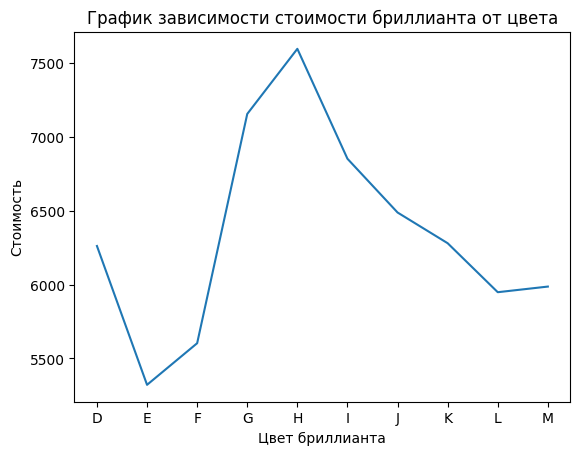

In [ ]:
df_without_None = diamonds_replaced.dropna(subset=['color', 'total_sales_price'])
df_groups = df_without_None.groupby('color')['total_sales_price'].mean()
plt.title('График зависимости стоимости бриллианта от цвета')
plt.plot(df_groups.index, df_groups.values)
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

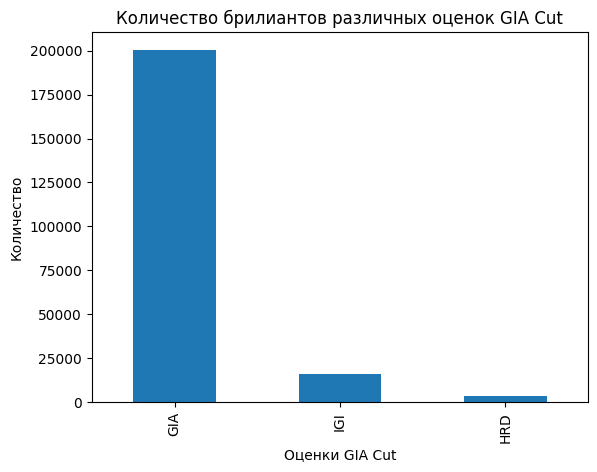

In [ ]:
df_without_None = diamonds_replaced[['lab']].dropna()
graphic = df_without_None['lab'].value_counts()
graphic.plot(kind='bar')
plt.xlabel('Оценки GIA Cut')
plt.ylabel('Количество')
plt.title('Количество брилиантов различных оценок GIA Cut')
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

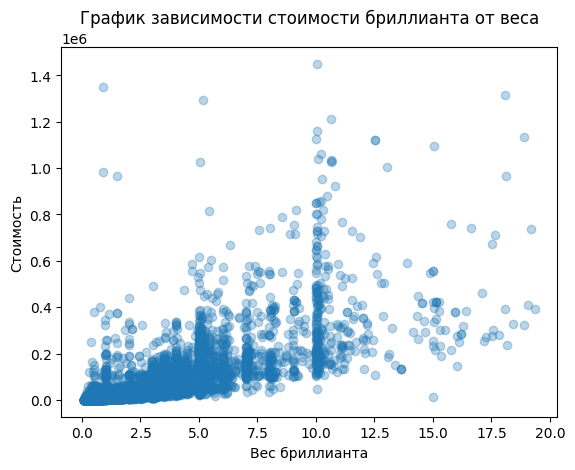

In [ ]:
df_without_None = diamonds_replaced[['carat_weight', 'total_sales_price']].dropna()

plt.scatter(df_without_None['carat_weight'], df_without_None['total_sales_price'], alpha = 0.3)
plt.xlabel('Вес бриллианта')
plt.ylabel('Cтоимость')
plt.title('График зависимости стоимости бриллианта от веса')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

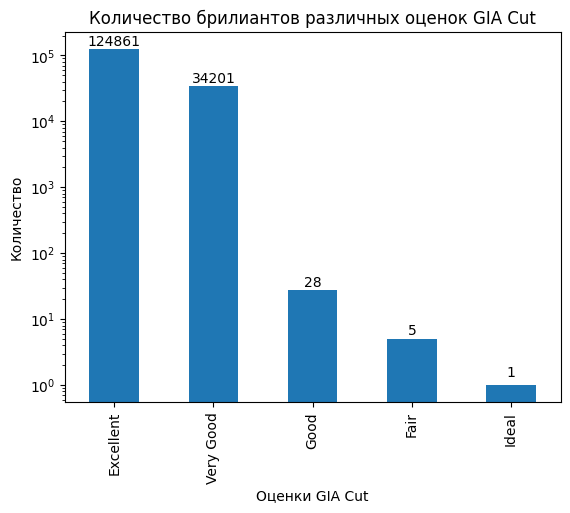

In [ ]:
df_without_None = diamonds_replaced[['cut_quality']].dropna()
graphic = df_without_None['cut_quality'].value_counts()
graphic.plot(kind='bar')
plt.xlabel('Оценки GIA Cut')
plt.ylabel('Количество')
for i, v in enumerate(graphic):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.semilogy()
plt.title('Количество брилиантов различных оценок GIA Cut')
plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

\>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*


1. По первому графику мы видим, что есть зависимость стоимости бриллианта от его цвета
2. Стоимость бриллианта увеличивается с ростом веса
3. Долю большую 90 процентов по количеству занимают бриллианты с оценкой "GIA"
4. Среди бриллиантов категории "GIA", большая часть имеет оценку "Exellent"

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
df = diamonds_replaced[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
print(df.head(10))

   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
print(df)

        meas_length  meas_width  meas_depth  total_sales_price
0              4.50        5.24        2.83               1088
1              5.22        5.26        3.40               1254
2              3.71        3.73        2.28                588
3              4.26        4.29        2.69               1030
4              4.44        4.46        2.80               1108
...             ...         ...         ...                ...
219698         5.14        5.17        3.11               2850
219699         5.88        5.92        3.68               3584
219700         6.60        6.65        4.03               6551
219701         5.72        5.76        3.58               4981
219702         3.90        3.81        2.70                792

[219703 rows x 4 columns]


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
df['minkovsky'] = ((df['meas_length']) ** 3 + (df['meas_width']) ** 3 + (df['meas_depth']) ** 3) ** (1/3)
print(df)

        meas_length  meas_width  meas_depth  total_sales_price  minkovsky
0              4.50        5.24        2.83               1088   6.363365
1              5.22        5.26        3.40               1254   6.889926
2              3.71        3.73        2.28                588   4.860297
3              4.26        4.29        2.69               1030   5.601185
4              4.44        4.46        2.80               1108   5.830408
...             ...         ...         ...                ...        ...
219698         5.14        5.17        3.11               2850   6.724433
219699         5.88        5.92        3.68               3584   7.722843
219700         6.60        6.65        4.03               6551   8.649162
219701         5.72        5.76        3.58               4981   7.513368
219702         3.90        3.81        2.70                792   5.121152

[219703 rows x 5 columns]


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
data_set = df[['minkovsky', 'total_sales_price']]

print(data_set)

        minkovsky  total_sales_price
0        6.363365               1088
1        6.889926               1254
2        4.860297                588
3        5.601185               1030
4        5.830408               1108
...           ...                ...
219698   6.724433               2850
219699   7.722843               3584
219700   8.649162               6551
219701   7.513368               4981
219702   5.121152                792

[219703 rows x 2 columns]


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
test_data = data_set.iloc[: round(data_set.shape[0]*0.2)]
train_data = data_set.iloc[round(data_set.shape[0]*0.2) :]
print(test_data)
print(train_data)


       minkovsky  total_sales_price
0       6.363365               1088
1       6.889926               1254
2       4.860297                588
3       5.601185               1030
4       5.830408               1108
...          ...                ...
43936   5.576870                850
43937   5.756120                960
43938  10.722916              11817
43939   8.411649               8678
43940   6.048135               2278

[43941 rows x 2 columns]
        minkovsky  total_sales_price
43941    9.617191              30417
43942    5.620933               1096
43943    5.705510               1356
43944    6.724387               1890
43945    7.340354               3330
...           ...                ...
219698   6.724433               2850
219699   7.722843               3584
219700   8.649162               6551
219701   7.513368               4981
219702   5.121152                792

[175762 rows x 2 columns]


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

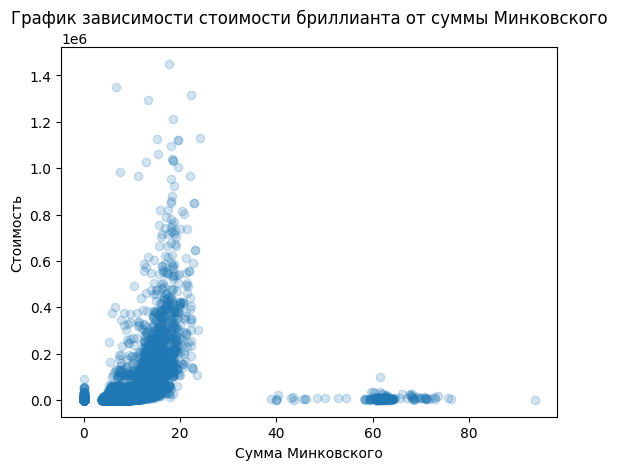

In [ ]:
train_data_without_None = train_data.dropna()

plt.scatter(train_data_without_None['minkovsky'], train_data_without_None['total_sales_price'], alpha = 0.2)
plt.xlabel('Сумма Минковского')
plt.ylabel('Cтоимость')
plt.title('График зависимости стоимости бриллианта от суммы Минковского')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

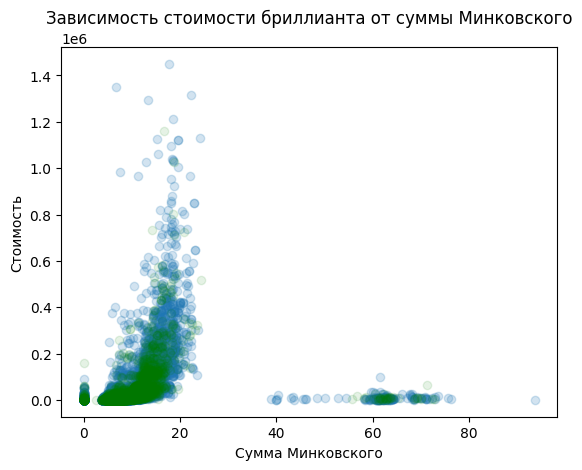

In [ ]:
test_data_without_None = test_data.dropna()

plt.scatter(train_data_without_None['minkovsky'], train_data_without_None['total_sales_price'], alpha = 0.2)
plt.scatter(test_data_without_None['minkovsky'], test_data_without_None['total_sales_price'], alpha = 0.1, color = "green")
plt.xlabel('Сумма Минковского')
plt.ylabel('Cтоимость')
plt.title('Зависимость стоимости бриллианта от суммы Минковского')
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categories = ["cut", "color", "clarity", "cut_quality", "lab", "symmetry", "polish", "girdle_min", "girdle_max"]
df = diamonds[categories]
df = pd.DataFrame(OneHotEncoder(sparse_output=False).fit_transform(df))
price = diamonds["total_sales_price"]
df



,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, price, test_size=0.25, random_state=42)


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 7)
model.fit(X_train, y_train)
model.predict(X_test)


array([9610.95707167, 5316.5111917 , 4890.53847496, ..., 5316.5111917 ,
       2994.43589629, 5316.5111917 ])

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
from sklearn.metrics import mean_squared_error

df = diamonds[categories]

min_error = 100000000000
col1 = None
col2 = None
for first_col in df.columns.tolist():
    for second_col in df.columns.tolist():
        if first_col == second_col:
            continue
        dt = pd.DataFrame(OneHotEncoder(sparse_output=False).fit_transform(df[[first_col, second_col]]))
        x_train, x_test, y_train, y_test = train_test_split(dt, price, test_size=0.25, random_state=42)
        model = DecisionTreeRegressor(max_depth = 7)
        model.fit(x_train, y_train)
        error = mean_squared_error(y_test, model.predict(x_test))
        if error < min_error:
            min_error = error
            col1 = first_col
            col2 = second_col
print(f"Лучший результат {min_error} достигается при столбцах {col1, col2}")

Лучший результат 785778045.9631853 достигается при столбцах ('cut', 'symmetry')


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

Ваши выводы здесь :)
Лучшими категориальными признаками являются симметрия и огранка, ведь если использовать эти параметры для обучения модели, получится результат ошибки меньше, чем при других показателях, однако и он является сильно большим. И это понятно, ведь не учитываются другие параметры, которые так же влияют на ценообразование.